#Классификация данных


- используемый датасет: Hearts Desease (https://archive.ics.uci.edu/dataset/45/heart+disease)

##Анализ данных

In [ ]:
pip install ucimlrepo

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

class colors:
    purp = '\033[95m'  # Purple color
    blue = '\033[94m'  # Blue color
    green = '\033[92m'  # Green color
    yell = '\033[93m'  # Yellow color
    red = '\033[91m'  # Red color
    fiolet = '\033[35m'
    bold = '\033[1m'  # Bold
    uline = '\033[4m'  # Underline
    endc = '\033[0m'  # End of color line

In [ ]:
from ucimlrepo import fetch_ucirepo

heart_disease = fetch_ucirepo(id=45)

ds = heart_disease.data.features
ds_target = heart_disease.data.targets

#print(heart_disease.metadata)

print(f"{colors.blue}{colors.bold}Поясняющая информация{colors.endc}")
print(heart_disease.variables)

print(f"{colors.purp}{colors.bold}\n\nДАТАСЕТ{colors.endc}")
with pd.option_context('display.max_columns', None):
  display(ds)

Поясняющая информация
        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None           

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


In [ ]:
ds.shape

(303, 13)

In [ ]:
ds.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [ ]:
ds_target.value_counts()   #классы несбалансированы

,count
num,
0,164
1,55
2,36
3,35
4,13


In [ ]:
df_concat = pd.concat([ds, ds_target], axis=1)
print(df_concat)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  num  
0        3  0.0   6.0    0  
1        2  3.0   3.0    2  


##Визуализация данных

<ipython-input-27-25a0af5a4920>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='num', y = df_concat.columns[i], data=df_concat, inner='quartile', palette='pastel')


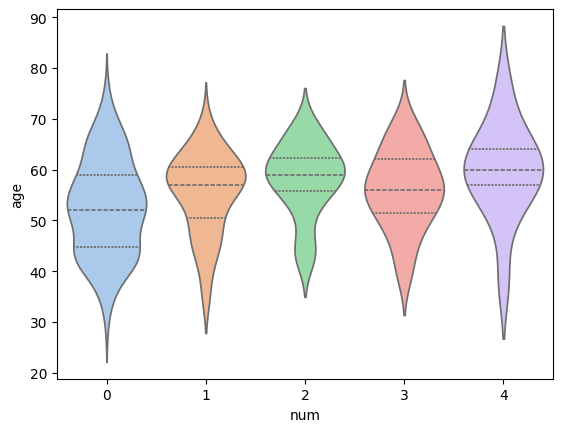

<ipython-input-27-25a0af5a4920>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='num', y = df_concat.columns[i], data=df_concat, inner='quartile', palette='pastel')


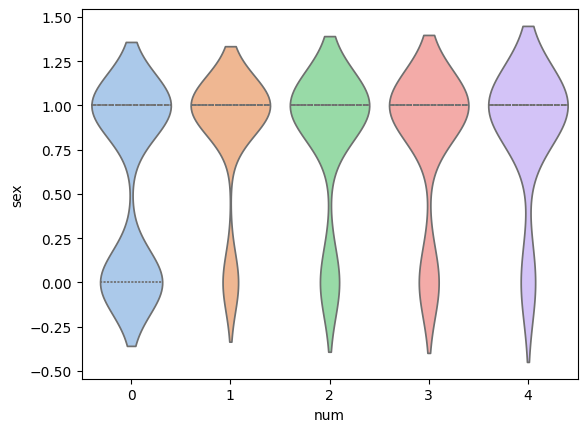

<ipython-input-27-25a0af5a4920>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='num', y = df_concat.columns[i], data=df_concat, inner='quartile', palette='pastel')


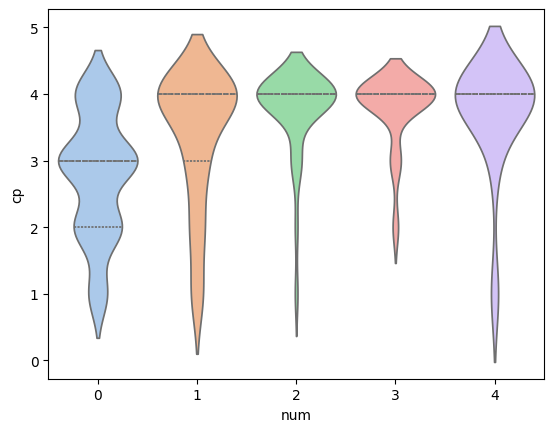

<ipython-input-27-25a0af5a4920>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='num', y = df_concat.columns[i], data=df_concat, inner='quartile', palette='pastel')


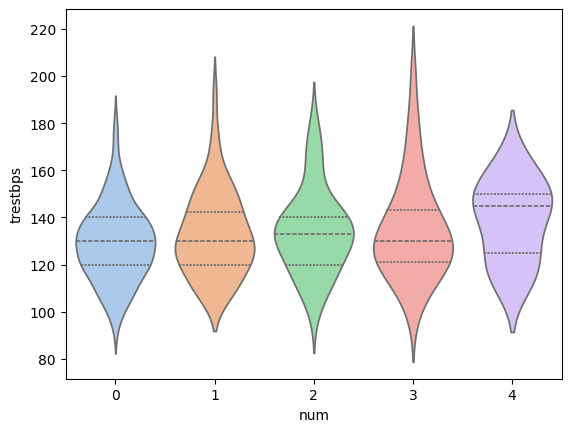

<ipython-input-27-25a0af5a4920>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='num', y = df_concat.columns[i], data=df_concat, inner='quartile', palette='pastel')


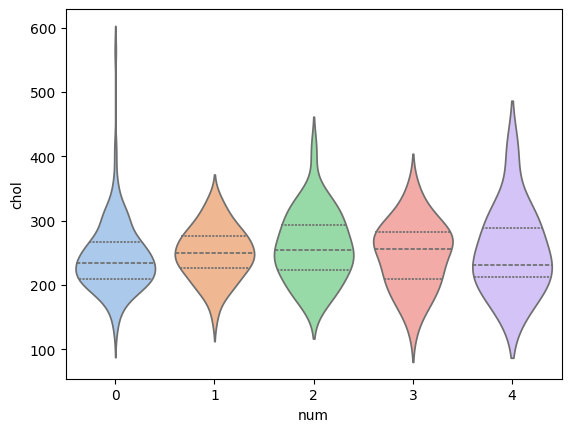

<ipython-input-27-25a0af5a4920>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='num', y = df_concat.columns[i], data=df_concat, inner='quartile', palette='pastel')


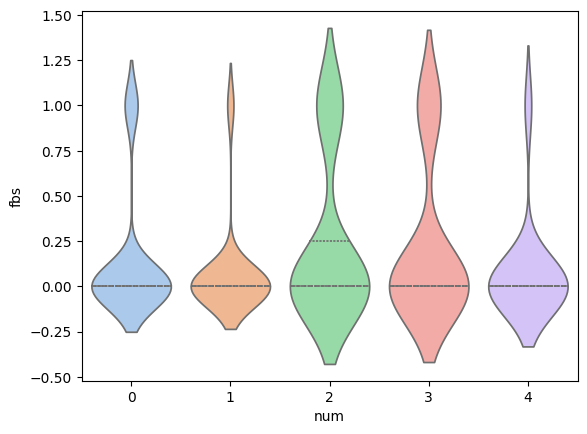

<ipython-input-27-25a0af5a4920>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='num', y = df_concat.columns[i], data=df_concat, inner='quartile', palette='pastel')


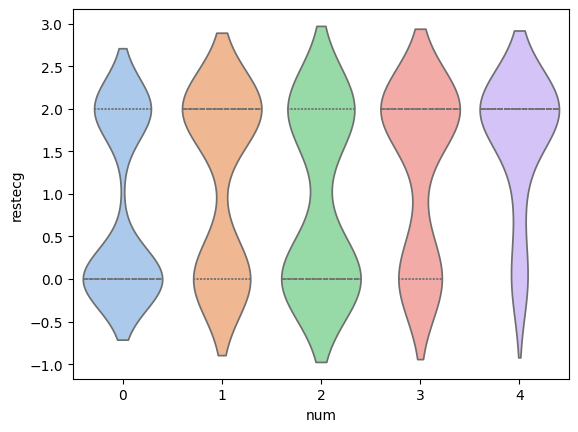

<ipython-input-27-25a0af5a4920>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='num', y = df_concat.columns[i], data=df_concat, inner='quartile', palette='pastel')


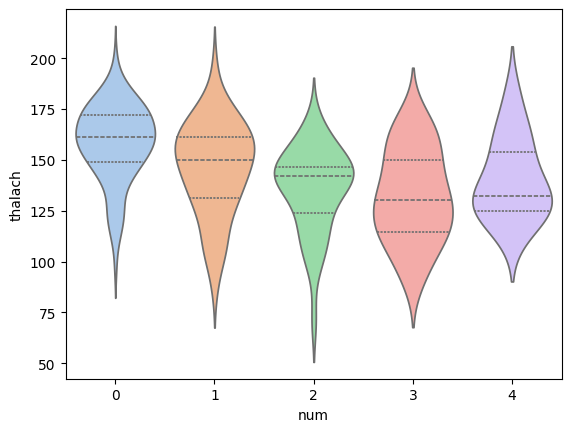

<ipython-input-27-25a0af5a4920>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='num', y = df_concat.columns[i], data=df_concat, inner='quartile', palette='pastel')


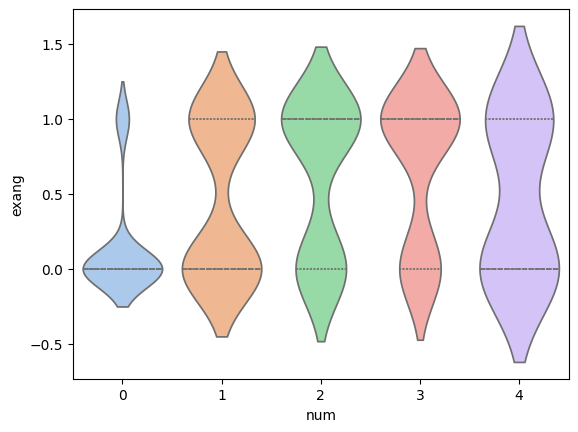

<ipython-input-27-25a0af5a4920>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='num', y = df_concat.columns[i], data=df_concat, inner='quartile', palette='pastel')


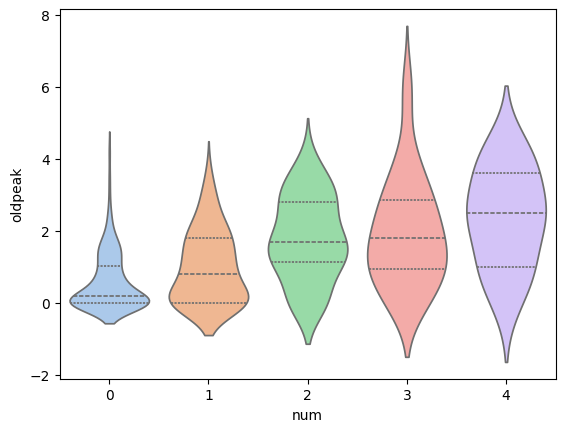

<ipython-input-27-25a0af5a4920>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='num', y = df_concat.columns[i], data=df_concat, inner='quartile', palette='pastel')


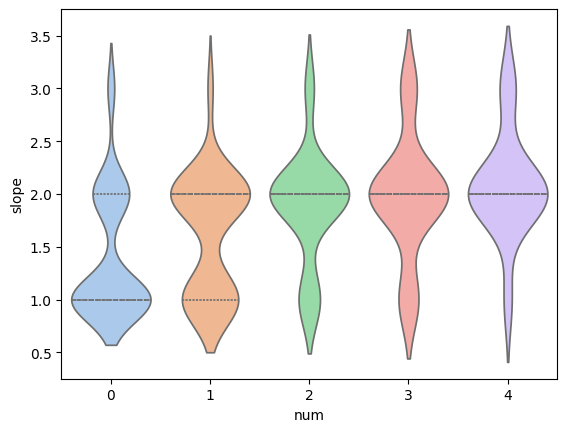

<ipython-input-27-25a0af5a4920>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='num', y = df_concat.columns[i], data=df_concat, inner='quartile', palette='pastel')


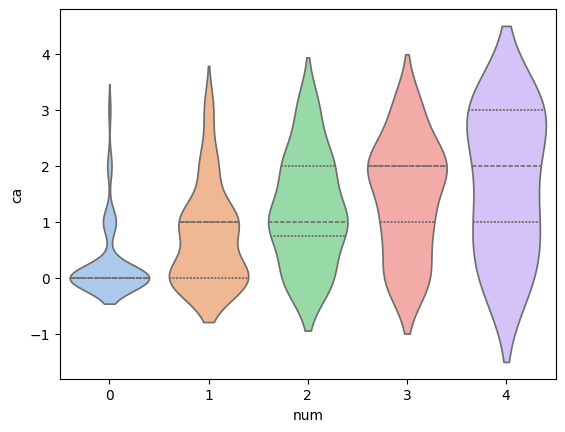

<ipython-input-27-25a0af5a4920>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='num', y = df_concat.columns[i], data=df_concat, inner='quartile', palette='pastel')


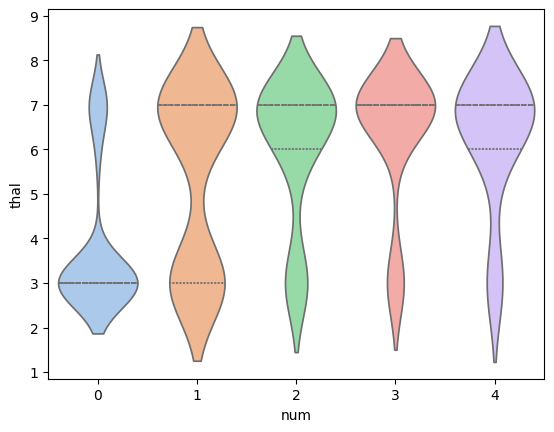

In [ ]:
#смотрим распределение признаков по классам
for i in range(0, ds.shape[1], 1):
  sns.violinplot(x='num', y = df_concat.columns[i], data=df_concat, inner='quartile', palette='pastel')
  plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

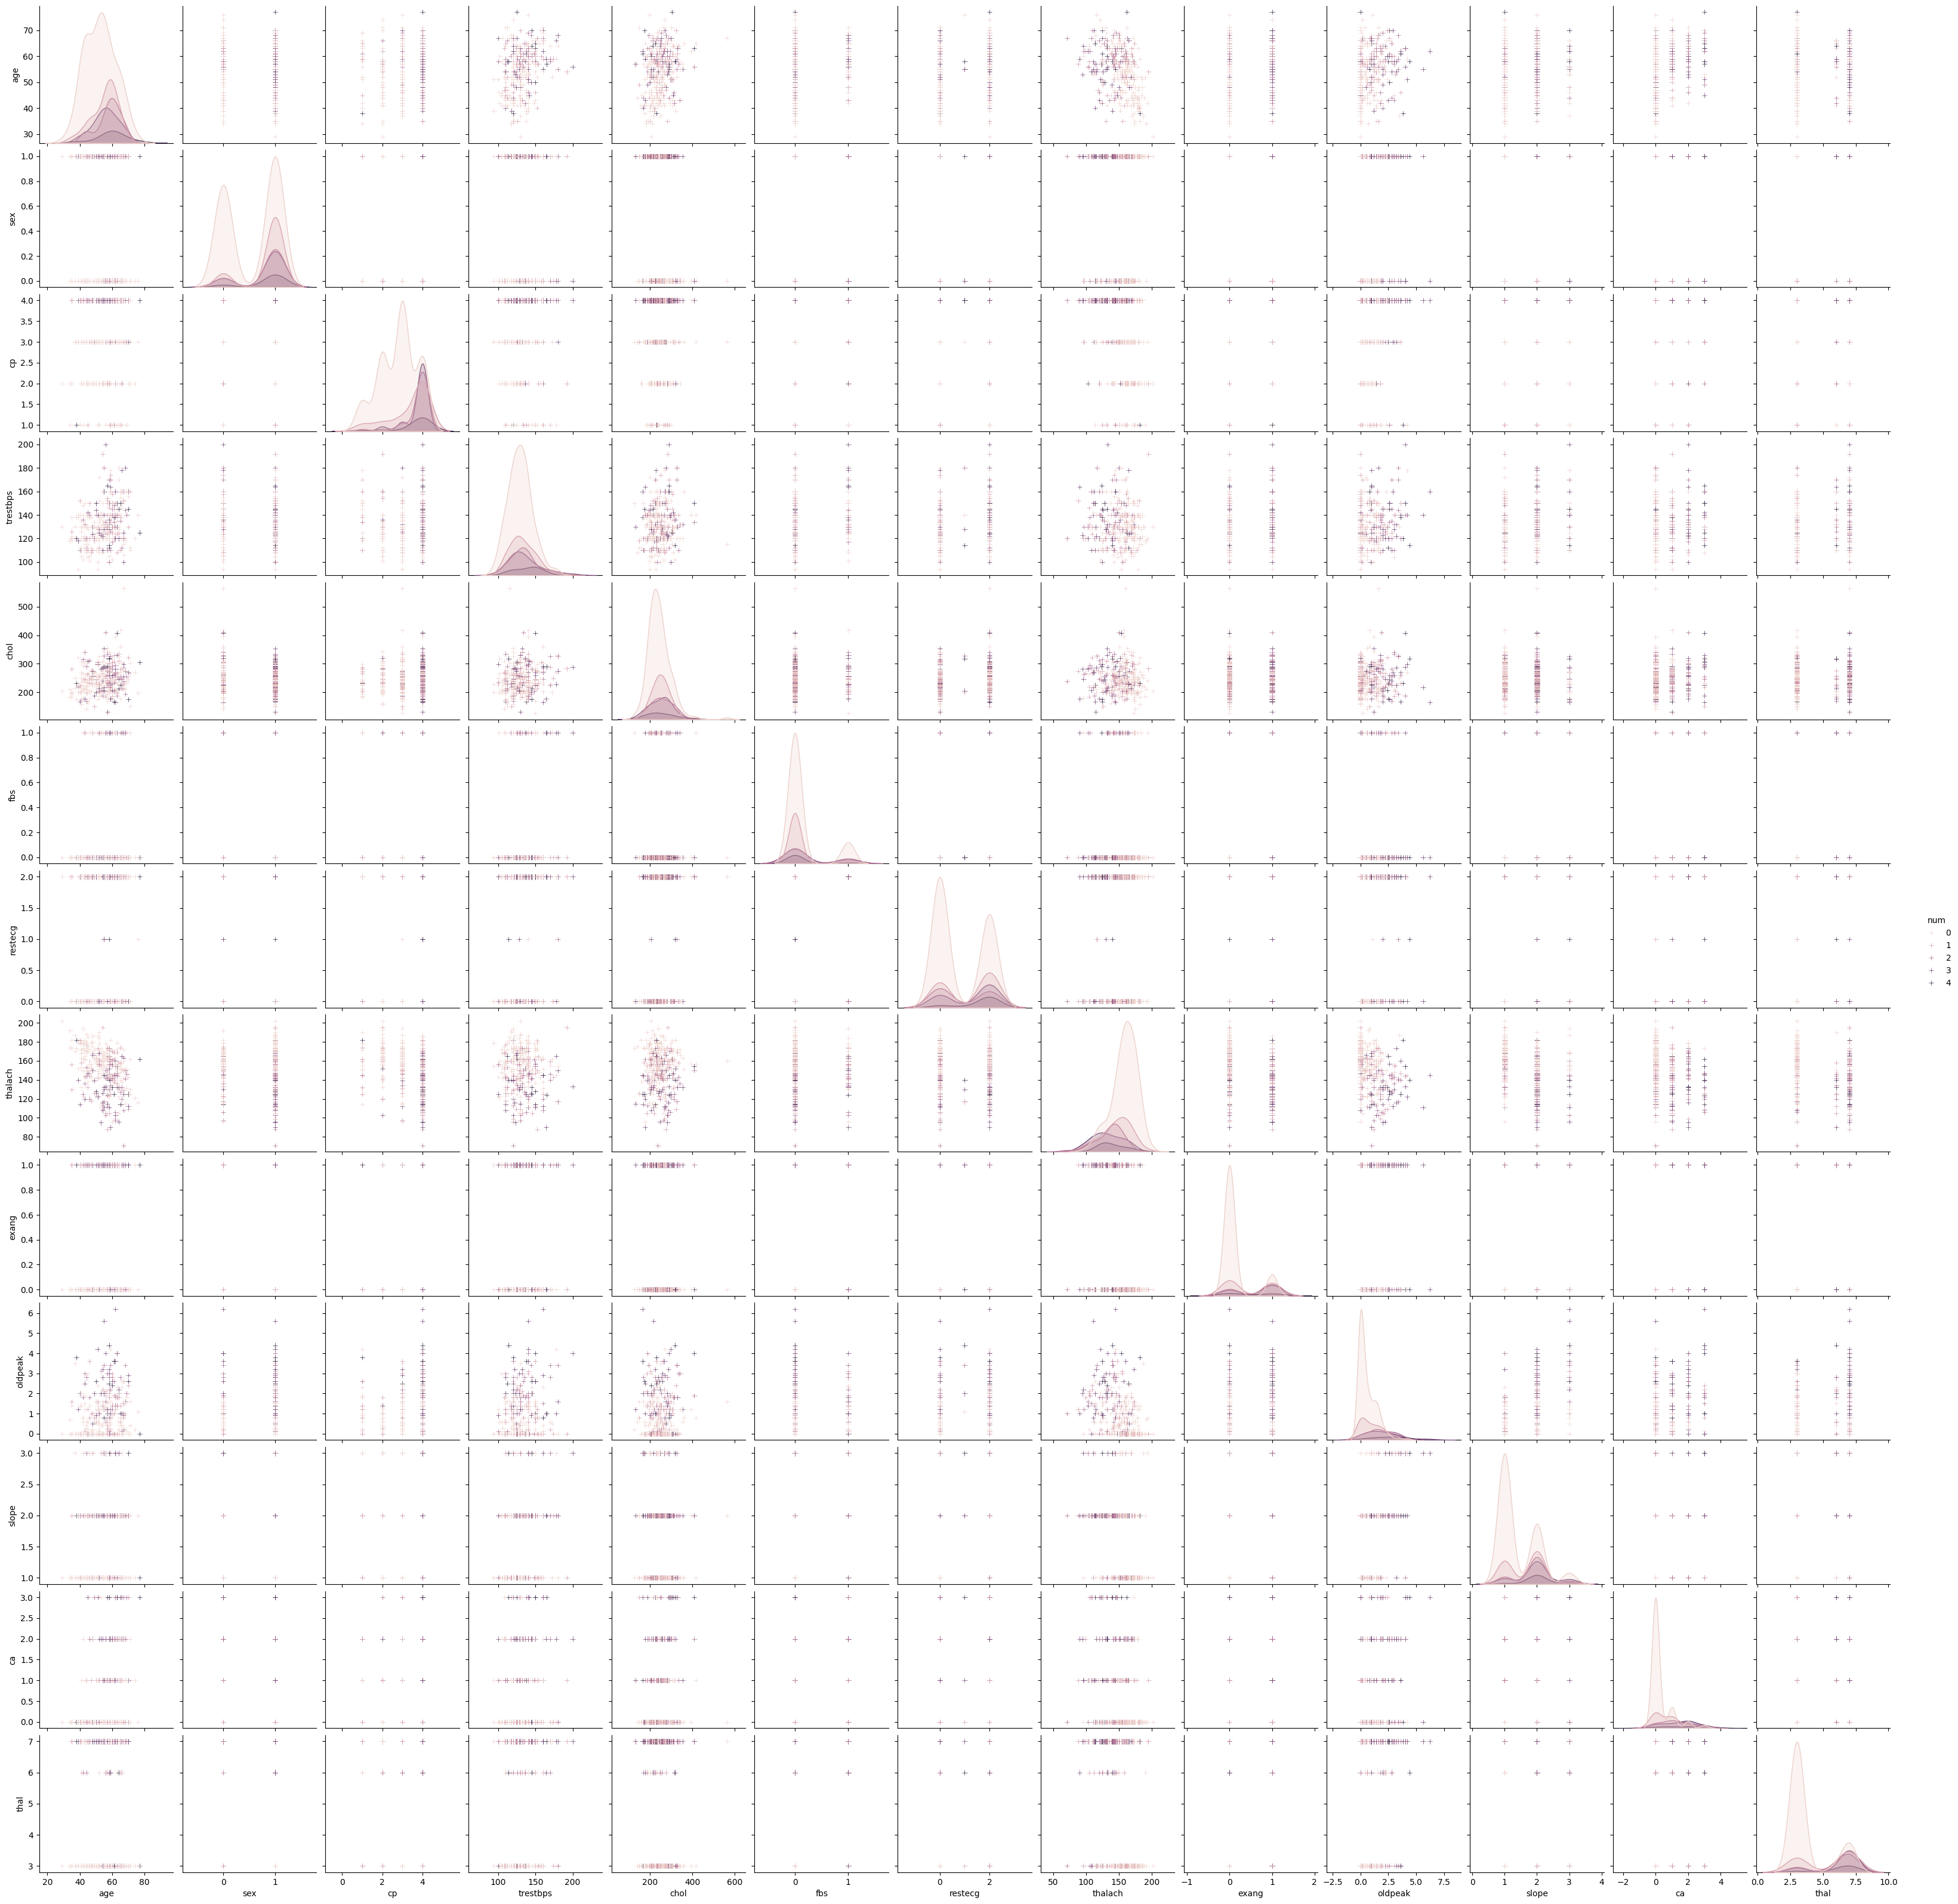

In [ ]:
#попарные двумерные распределения
sns.pairplot(df_concat, hue='num', markers='+')
plt.show()

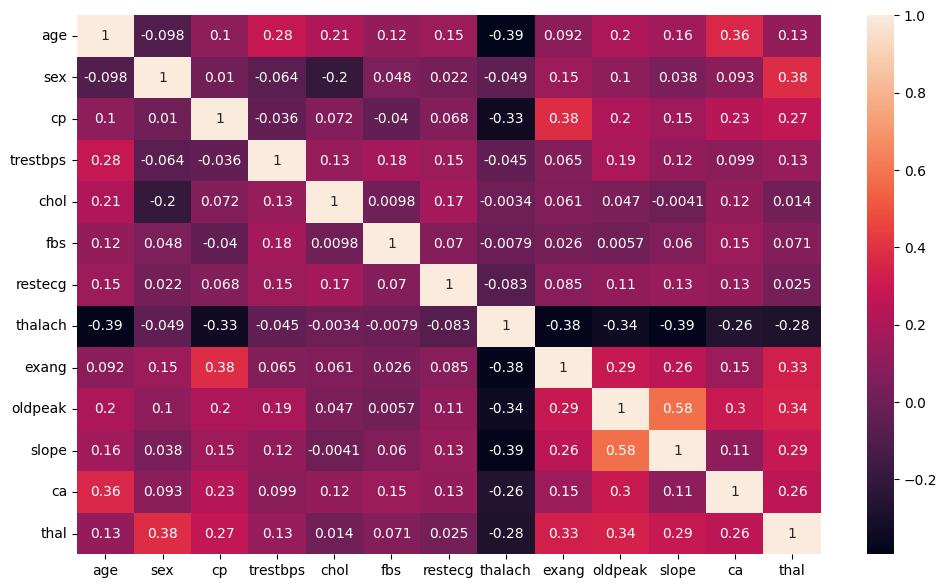

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(ds.corr(numeric_only = True), annot=True)
plt.show()

Наибольшая положительная корреляция: депрессия ST, вызванная физической нагрузкой и наклон сегмента ST пиковой нагрузки
количество крупных сосудов, окрашенных флюороскопией и пол
тип боли в груди и стенокардия, вызванная физическими нагрузками
Наиболашая отрицательная корреляция:
возраст и максимальная достигнутая частота сердечных сокращений
максимальная достигнутая частота сердечных сокращений и стенокардия, вызванная физической нагрузкой

##Классификация

###Построение модели

1) Разбиение датасета

In [ ]:
df_concat.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df_concat = df_concat.dropna()

In [ ]:
df_concat.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df_concat.shape

(297, 14)

In [ ]:
#само разбиение
X = df_concat.drop(['num'], axis=1)
y = df_concat['num']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (297, 13) | y shape: (297,) 


2) Разбиение на обучающий и тестовый наборы

In [ ]:
#80% на обучение, остальное - тесты
import scipy.stats as stats

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=False)

stats.ttest_ind(a=y_train, b=y_test)

TtestResult(statistic=0.015469786435258474, pvalue=0.9876678455967678, df=295.0)

3) Выбор оптимальной модели

пробуем следующие:
- Logistic Regression (LR) </br>
- Linear Discriminant Analysis (LDA)</br>
- K-Nearest Neighbors (KNN)</br>
- Classification and Regression Trees (CART)</br>
- Gaussian Naive Bayes (NB)</br>
- Support Vector Machines (SVM)</br>

In [ ]:
# создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy', error_score='raise')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.604286 (0.073839)
LDA: 0.580000 (0.099404)
KNN: 0.531905 (0.064393)
CART: 0.540952 (0.091304)
NB: 0.555714 (0.083681)
SVC: 0.545952 (0.019893)


лучшая точность у LR, поэтому буду использовать её

4) Обучение конкретной модели

In [ ]:
#нормализация/масштабирование данных
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [ ]:
#создаем модель логистической регрессии
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)  #создаём модель
model.fit(X_train, y_train)     #обучаем      #model.fit(X_train.values, Y_train.values)
Y_pred = model.predict(X_test)  #предсказание на тестовой выборке

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Классификация:                precision    recall  f1-score   support

           0       0.70      0.91      0.80        47
           1       0.27      0.19      0.22        16
           2       0.00      0.00      0.00        15
           3       0.31      0.44      0.36         9
           4       0.00      0.00      0.00         3

    accuracy                           0.56        90
   macro avg       0.26      0.31      0.28        90
weighted avg       0.45      0.56      0.49        90



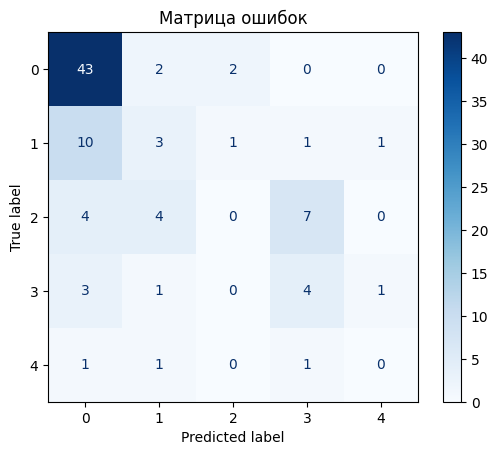

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

m = confusion_matrix(y_test, Y_pred)        #передаем в матрицу ошибок тестовые и прогнозные значения

#выводим в виде графика
m_display = ConfusionMatrixDisplay(confusion_matrix = m)
m_display.plot(cmap=plt.cm.Blues)
plt.title('Матрица ошибок')

print('Классификация: ', classification_report(y_test, Y_pred))

###Визуализация

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<Axes: >

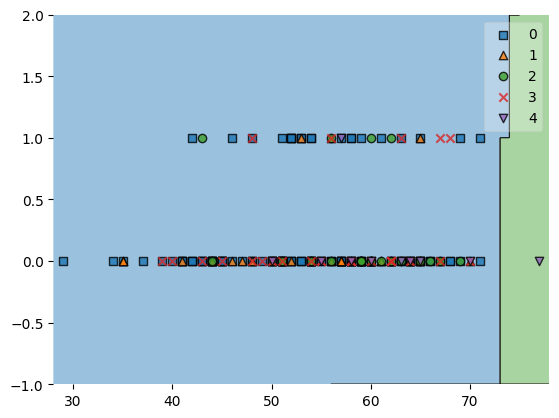

In [ ]:
from mlxtend.plotting import plot_decision_regions

y_s = y_train
X_2d= X_train[['age',	'fbs']].values

y_2d = y_s.values

m = LogisticRegression()  #создаём модель
m.fit(X_2d, y_2d)

plot_decision_regions(
    	X=X_2d,
    	y=y_2d,
    	clf=m)

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<Axes: >

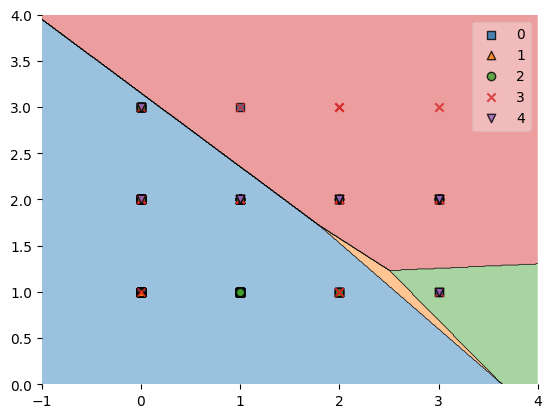

In [ ]:
y_s = y_train
X_2d= X_train[['ca',	'slope']].values

y_2d = y_s.values

m = LogisticRegression()
m.fit(X_2d, y_2d)

plot_decision_regions(
    	X=X_2d,
    	y=y_2d,
    	clf=m)

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<Axes: >

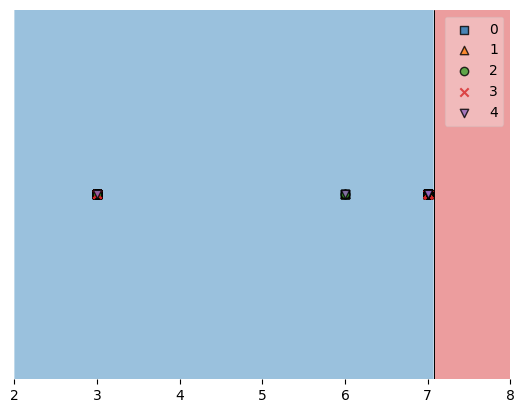

In [ ]:
y_s = y_train
X_2d= X_train[['thal']].values

y_2d = y_s.values

m = LogisticRegression()
m.fit(X_2d, y_2d)

plot_decision_regions(
    	X=X_2d,
    	y=y_2d,
    	clf=m)